In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Search Term
target_news = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
# Lists to hold sentiments
results_list = []

#Loop through each news
for news in target_news:
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    #Loop through 100 tweets
    for x in range(5):
        public_tweets = api.user_timeline(news, page = x)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            # Run Vader Analysis on each tweet
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
    
    #Dictionary of each news
    news_results = {
        "News": news,
        "Compound Score": np.mean(compound_list),
    }
    
    #Apend dictionary to list
    results_list.append(news_results)
    
    print(f"News: {news}")
    print(f"Compound: {np.mean(compound_list):.3f}")
 

News: @BBC
Compound: 0.099
News: @CBS
Compound: 0.153
News: @CNN
Compound: 0.103
News: @FoxNews
Compound: 0.135
News: @nytimes
Compound: 0.067


In [5]:
news_df = pd.DataFrame(results_list).set_index("News").round(3)
news_df

,Compound Score
News,
@BBC,0.099
@CBS,0.153
@CNN,0.103
@FoxNews,0.135
@nytimes,0.067


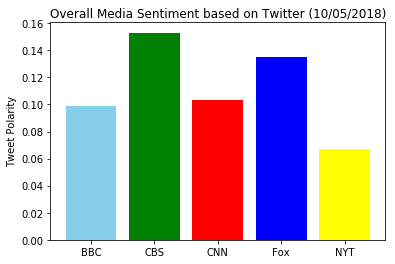

In [6]:
date_of_analysis = pd.Timestamp("today").strftime("%m/%d/%Y")
y_axis = news_df["Compound Score"]
plt.bar(target_news,y_axis, align="center",color=['skyblue', 'green', 'red', 'blue', 'yellow'])

tick_locations = [value for value in target_news]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])

plt.title(f"Overall Media Sentiment based on Twitter ({date_of_analysis})")
plt.ylabel("Tweet Polarity")


#Save the figure
plt.savefig("HW7_Overall_Sentiment.png")